<a href="https://colab.research.google.com/github/hanumanthuNani/Python-Data-Science-Machine-Learning-Integrated---Hybrid-Project-/blob/main/Project_Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Collection

In [5]:
import pandas as pd

# Load the dataset
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
count=data.isnull().sum()
count

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
mean_age=data['Age'].mean()

In [8]:
data["Age"].fillna(mean_age,inplace=True)

In [9]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
# Renaming columns for better readability
data.columns = ["CustomerID", "Gender", "Age", "AnnualIncome", "SpendingScore"]


In [ ]:
data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19.000000,15.0,39.0
1,2,Male,21.000000,15.0,81.0
2,3,Female,38.704663,16.0,6.0
3,4,Female,23.000000,16.0,77.0
4,5,Female,31.000000,NaN,40.0
...,...,...,...,...,...
195,196,Female,35.000000,120.0,79.0
196,197,Female,45.000000,126.0,28.0
197,198,Male,32.000000,126.0,74.0
198,199,Male,32.000000,137.0,18.0


In [11]:
mode_gender=data['Gender'].mode()[0]
type(mode_gender)
mode_gender

'Female'

In [12]:
data.dropna(inplace=True)

In [13]:
data["Gender"].fillna(mode_gender,inplace=True)

In [14]:
data.head(20)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [15]:
count=data.isnull().sum()
count

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


In [16]:
# Data transformation (e.g., encoding categorical variables)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [17]:
count=data.isnull().sum()
count

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


In [18]:
data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [19]:
data.dropna(subset=['Gender'], inplace=True)
data['Gender'] = data['Gender'].astype(int)

## EDA

In [20]:
data.describe()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

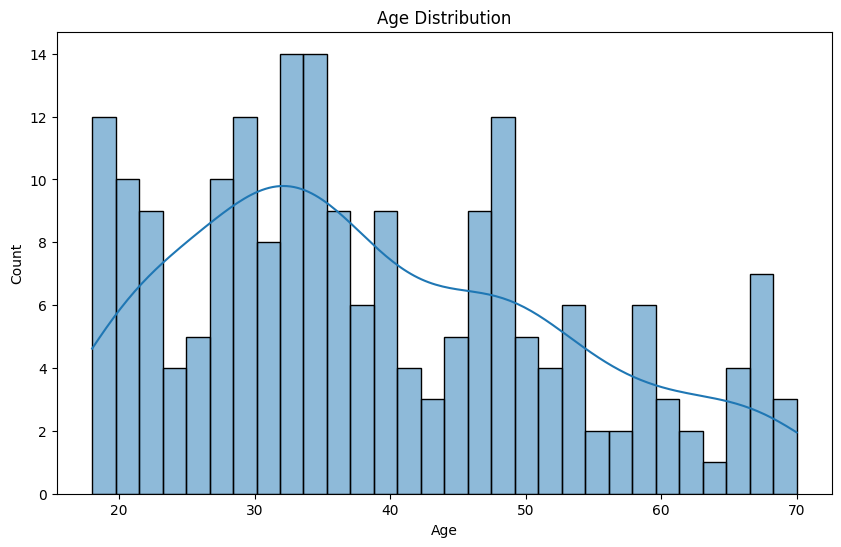

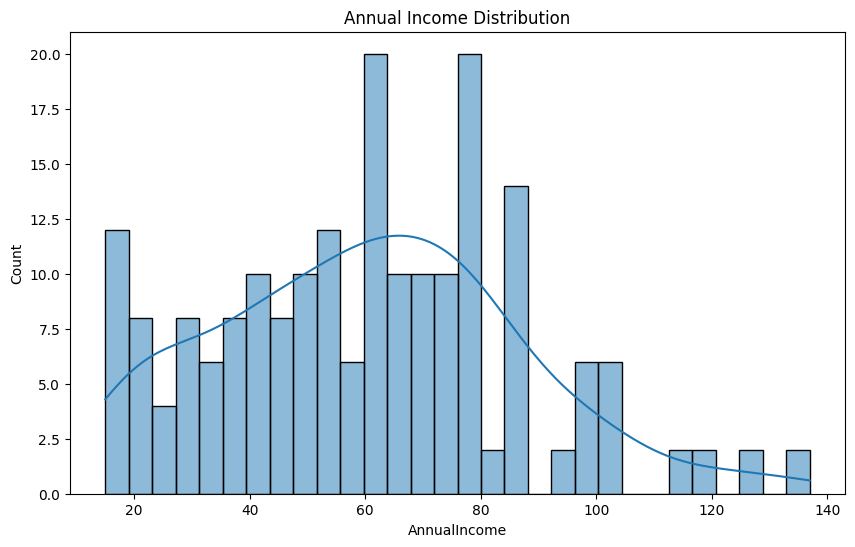

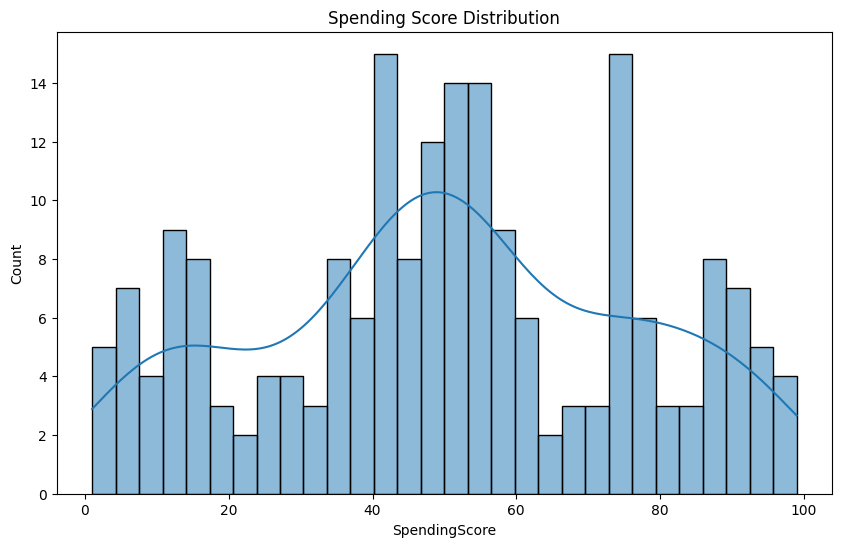

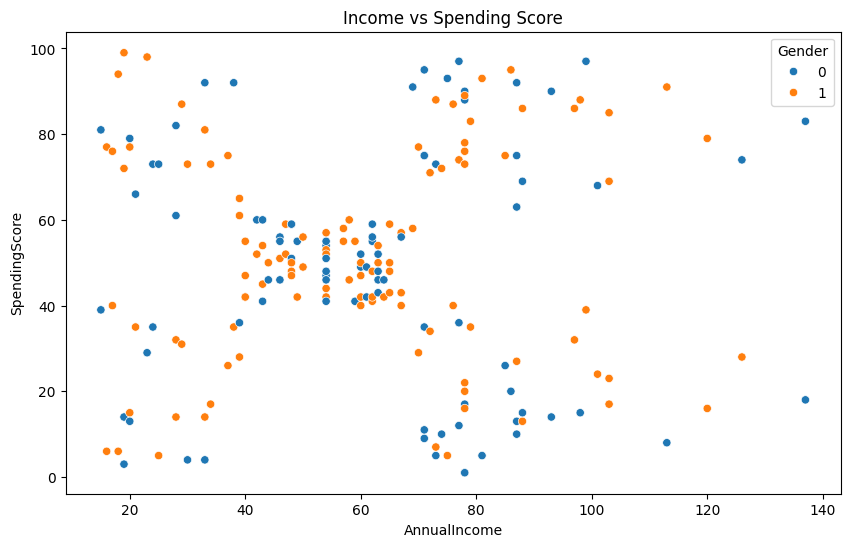

In [22]:
#histplot-Age,Annual income,Spending score
# Visualizing distributions
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['AnnualIncome'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['SpendingScore'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.show()

# Visualizing relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Gender')
plt.title('Income vs Spending Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


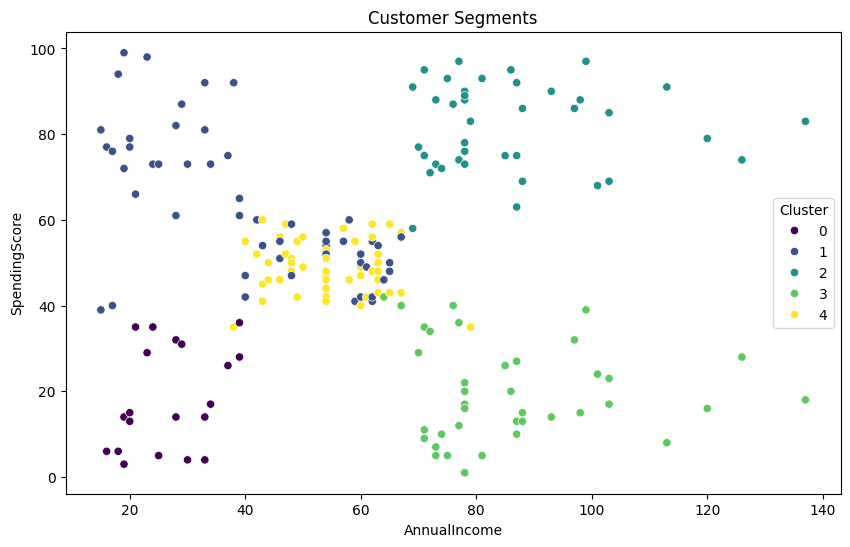

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature selection
features = data[['Age', 'AnnualIncome', 'SpendingScore']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluating cluster quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()
